# Task 6.6

### Contents:
#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing Data Set

## 1. Import Libraries and Data

In [101]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [102]:
# Configure API key 

quandl.ApiConfig.api_key = 'NKUP_KCJgFyxbqzDhuc4'

In [103]:
# Importing the Zillow Realestate Data" variable.

data = quandl.get('MULTPL/SP500_DIV_YIELD_MONTH')

In [104]:
data.head()

,Value
Date,
1871-01-31,5.86
1871-02-28,5.78
1871-03-31,5.64
1871-04-30,5.49
1871-05-31,5.35


In [105]:
data.tail(20)

,Value
Date,
2022-05-31,1.57
2022-06-01,1.51
2022-06-30,1.64
2022-07-01,1.62
2022-07-31,1.65
2022-08-01,1.55
2022-08-31,1.56
2022-09-01,1.61
2022-09-30,1.70


In [106]:
data.shape

(1857, 1)

## 2. Subsetting, Wrangling, Cleaning

In [120]:
df = data.reset_index()

In [121]:
df.head()

,Date,Value
0,1871-01-31,5.86
1,1871-02-28,5.78
2,1871-03-31,5.64
3,1871-04-30,5.49
4,1871-05-31,5.35


In [134]:
# Check for duplicates

dups = df.duplicated()
dups.sum()

3

In [136]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of            Date  Value
0    1871-01-01   5.86
1    1871-02-01   5.78
2    1871-03-01   5.64
3    1871-04-01   5.49
4    1871-05-01   5.35
...         ...    ...
1852 2023-02-01   1.62
1853 2023-02-01   1.66
1854 2023-03-01   1.69
1855 2023-03-01   1.72
1856 2023-04-01   1.65

[1857 rows x 2 columns]>

In [156]:
#change date format to the first of the month.
df['Date'] = df['Date'].values.astype('datetime64[M]')
print (df)

           Date  Value
0    1871-01-01   5.86
1    1871-02-01   5.78
2    1871-03-01   5.64
3    1871-04-01   5.49
4    1871-05-01   5.35
...         ...    ...
1852 2023-02-01   1.62
1853 2023-02-01   1.66
1854 2023-03-01   1.69
1855 2023-03-01   1.72
1856 2023-04-01   1.65

[1857 rows x 2 columns]


In [157]:
# creating a Subset as the dat goes back until the 1870s. I will look at the 1970's to present day.

data_sub = df.loc[(df['Date'] >= '1970-01-01') & (df['Date'] < '2023-01-01')]

In [158]:
data_sub.head()

,Date,Value
1188,1970-01-01,3.50
1189,1970-02-01,3.63
1190,1970-03-01,3.58
1191,1970-04-01,3.69
1192,1970-05-01,4.18


In [143]:
dups = data_sub.duplicated()
dups.sum()

3

In [159]:
#dropping duplicates
data_sub = data_sub.drop_duplicates(subset=['Date'])

In [160]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
1970-01-01,3.50
1970-02-01,3.63
1970-03-01,3.58
1970-04-01,3.69
1970-05-01,4.18


In [161]:
data_sub.tail()

,Value
datetime,
2022-08-01,1.55
2022-09-01,1.61
2022-10-01,1.77
2022-11-01,1.69
2022-12-01,1.60


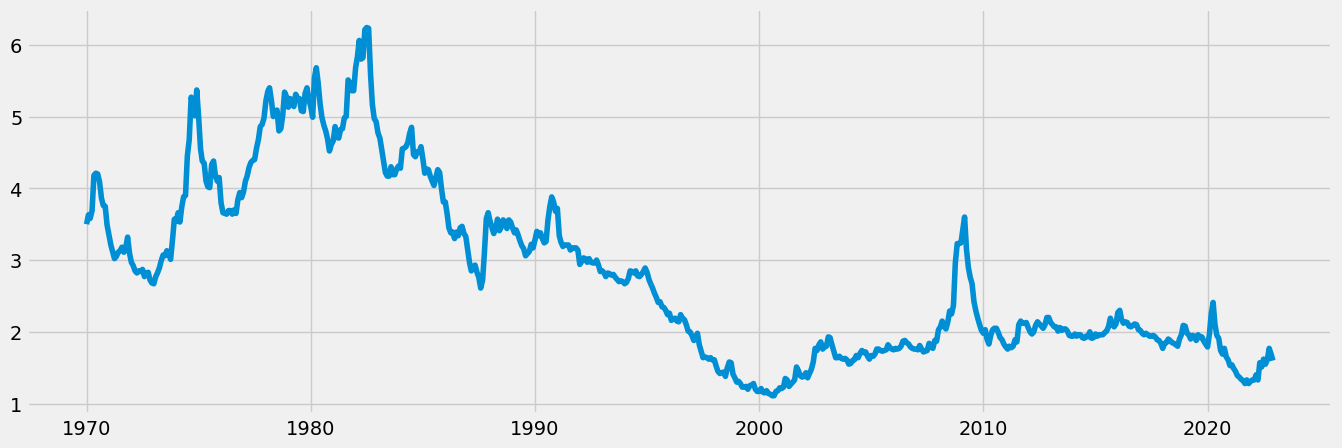

In [162]:
# Plotting the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [163]:
data_sub.isnull().value_counts()

Value
False    636
dtype: int64

## 3. Time Series Analysis
Decompostition

In [164]:
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [165]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

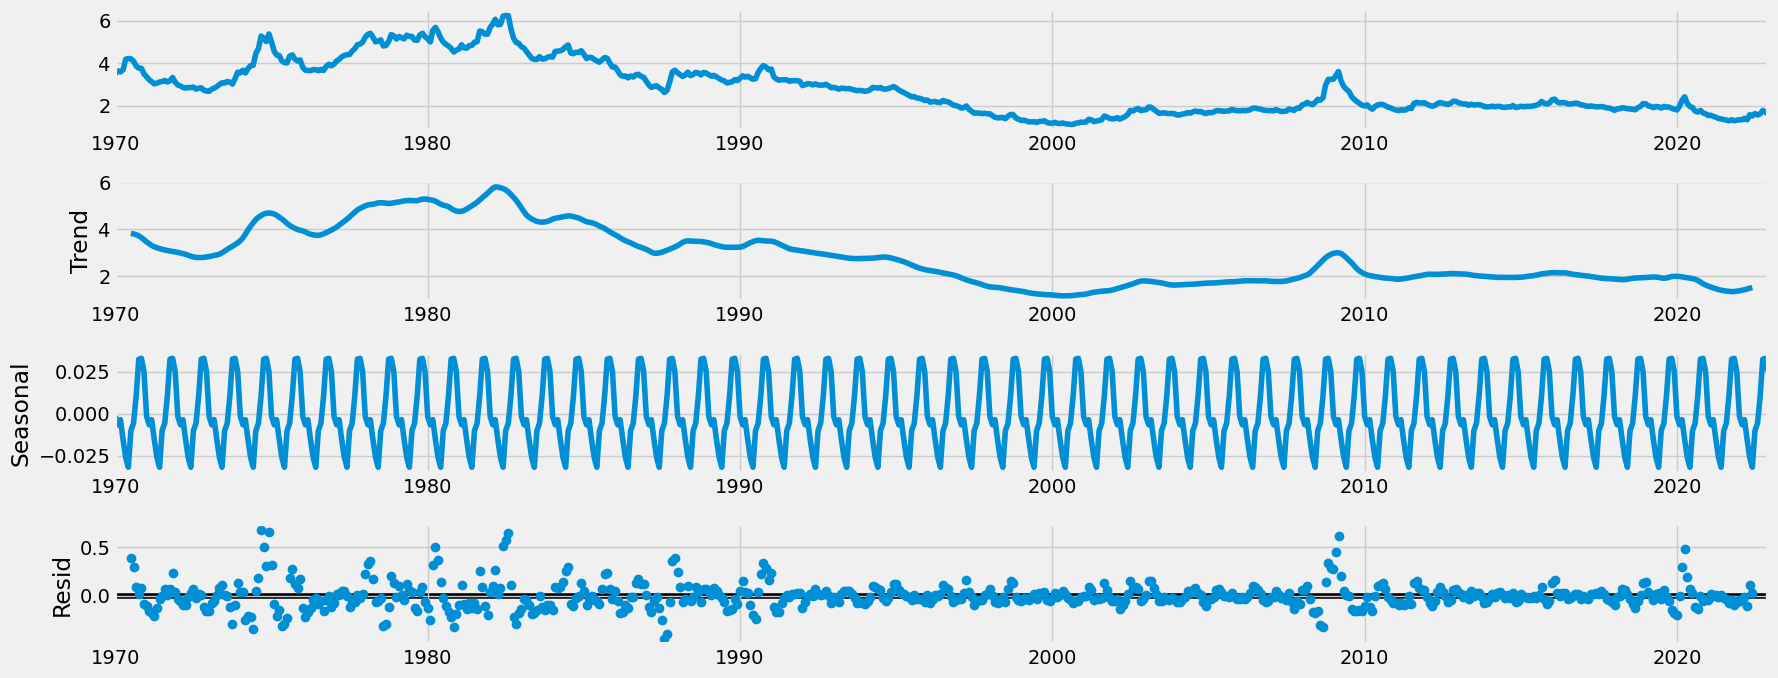

In [166]:
# Plot the separate components

decomposition.plot()
plt.show()

There was an overall possitive upward trend until just after 1980, the s gradual decline since. There is a slight increase before 2010 but it conitunes on it's negative regression. There is quite a bit of residual, data should be smothed out clean this up. 

## 4. Testing for Stationarity

In [167]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.357651
p-value                          0.602402
Number of Lags Used             12.000000
Number of Observations Used    623.000000
Critical Value (1%)             -3.440890
Critical Value (5%)             -2.866190
Critical Value (10%)            -2.569247
dtype: float64


The test statistic is larger than my critical values. There for I cannot reject the null hypothesis. 

In [168]:
# Data differencing
data_diff = data_sub - data_sub.shift(1)

In [169]:
data_diff.dropna(inplace = True) #removeing the missing values that came about as a result of the differencing. 

In [170]:
data_diff.columns

Index(['Value'], dtype='object')

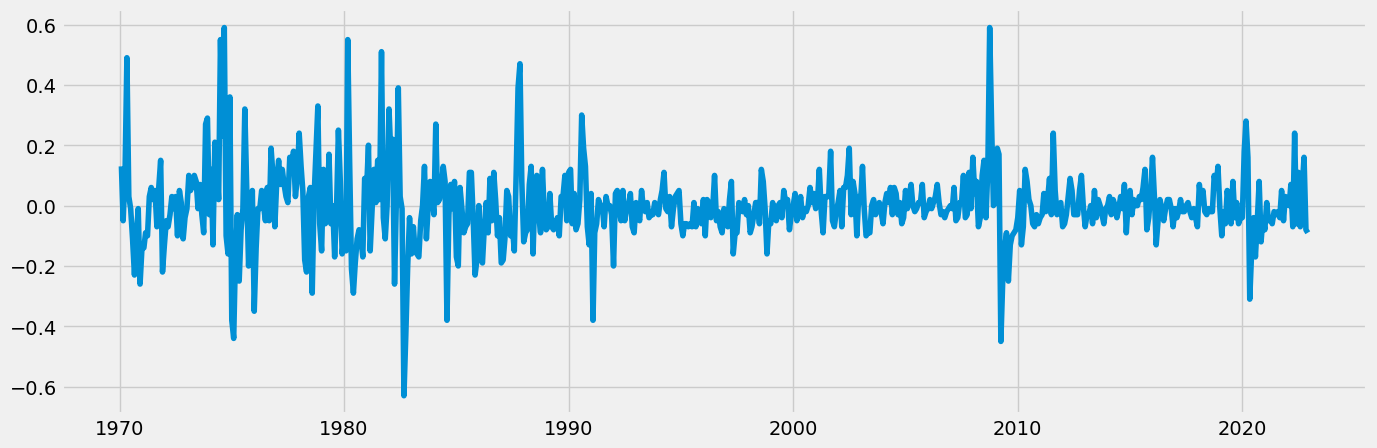

In [171]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [172]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -7.465473e+00
p-value                        5.218494e-11
Number of Lags Used            1.100000e+01
Number of Observations Used    6.230000e+02
Critical Value (1%)           -3.440890e+00
Critical Value (5%)           -2.866190e+00
Critical Value (10%)          -2.569247e+00
dtype: float64


We can now reject the null hypothesis. 

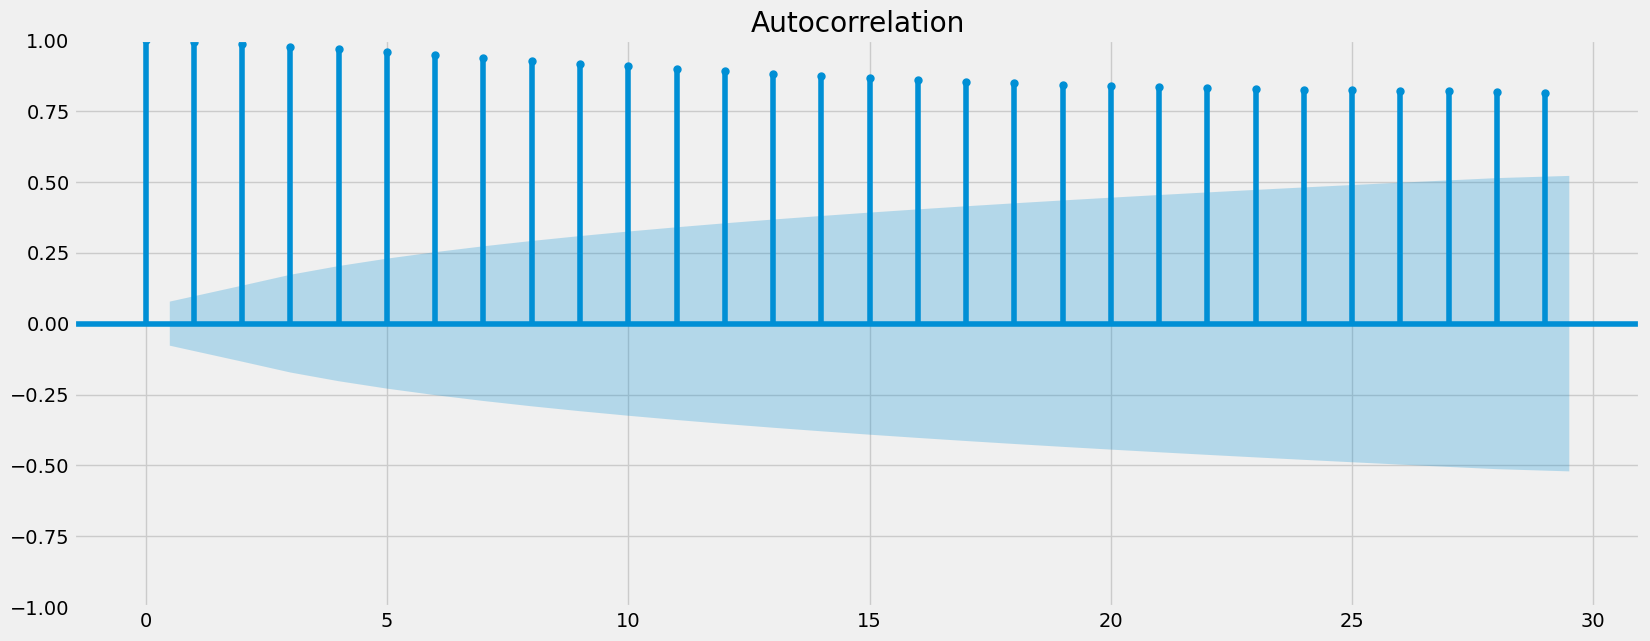

In [174]:
#plot of autocorrelations of original data

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

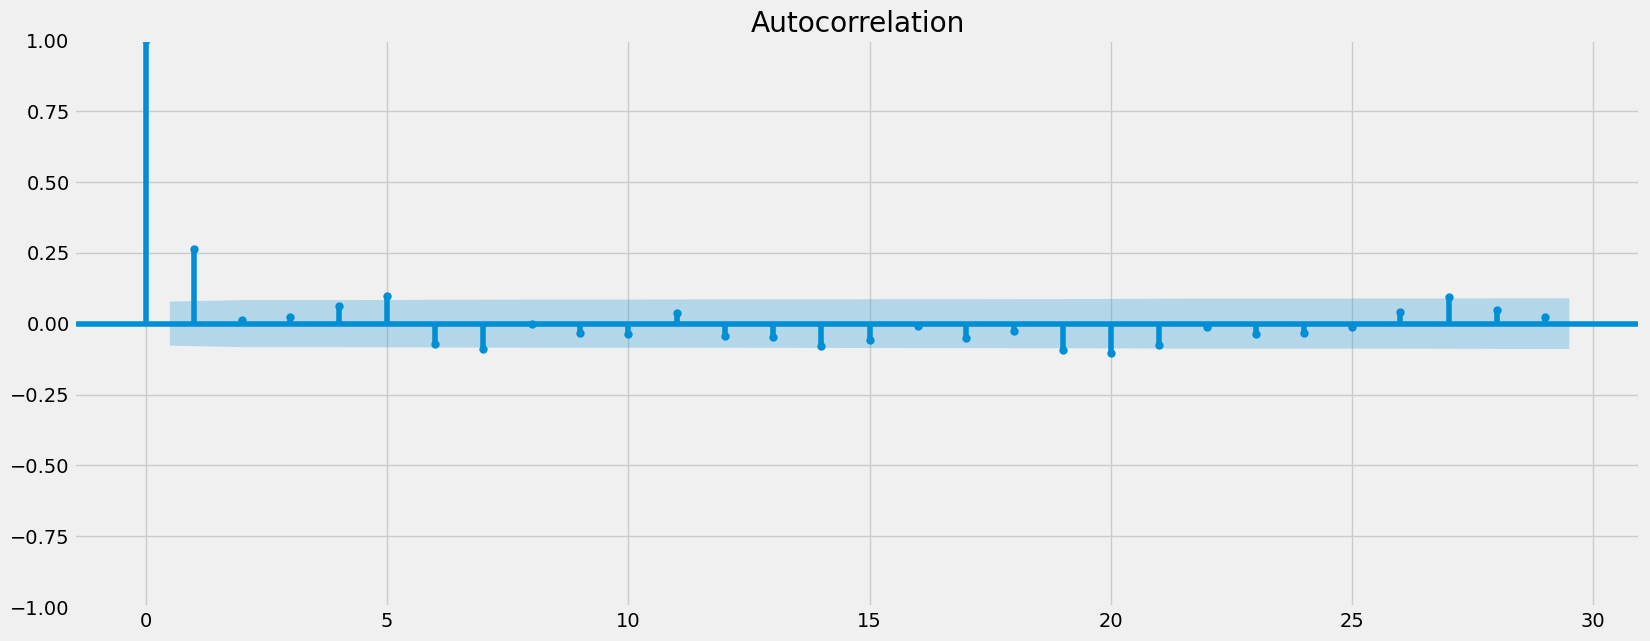

In [176]:
#plot of autocorrelations of differenced data

plot_acf(data_diff)
plt.show()